# Lab 7
Done by: Lexie Peterson  
Lab Partner: Kun Lee

In [49]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

In [50]:
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile)

infile2 = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile2)

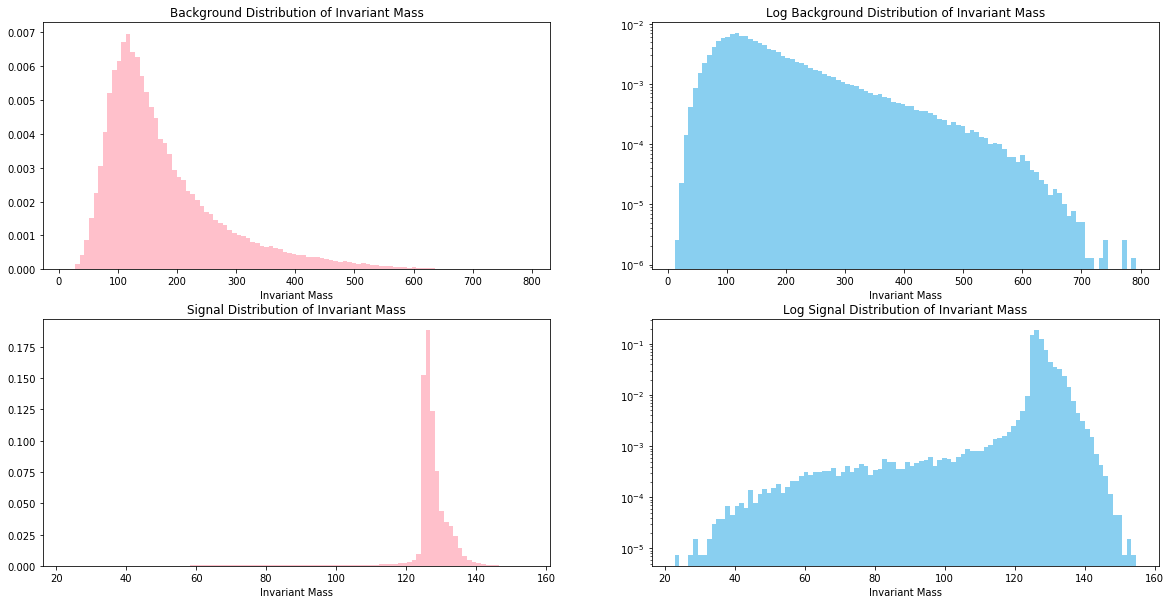

In [81]:
fig,ax = plt.subplots(2,2)                    
fig.set_size_inches(20,10)                   

#fig.tight_layout() 
ax[0,0].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0,0].set_xlabel("Invariant Mass")
ax[0,0].set_title("Background Distribution of Invariant Mass")

ax[0,1].hist(qcd['mass'], bins=100, density=True, color='#89cff0')
ax[0,1].set_xlabel("Invariant Mass")
ax[0,1].set_yscale('log')
ax[0,1].set_title("Log Background Distribution of Invariant Mass")


ax[1,0].hist(higgs['mass'], bins=100, density=True, color='pink')
ax[1,0].set_xlabel("Invariant Mass")
ax[1,0].set_title("Signal Distribution of Invariant Mass")

ax[1,1].hist(higgs['mass'], bins=100, density=True, color='#89cff0')
ax[1,1].set_xlabel("Invariant Mass")
ax[1,1].set_yscale('log')
ax[1,1].set_title("Log Signal Distribution of Invariant Mass");

## Problem 1

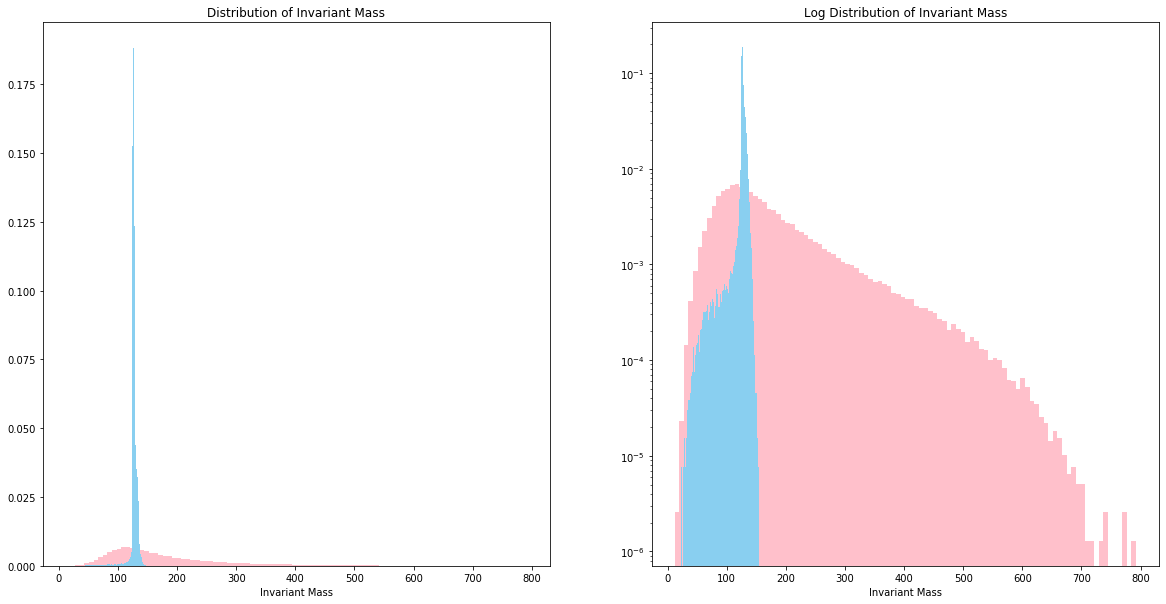

In [52]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(qcd['mass'], bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")


ax[0].hist(higgs['mass'], bins=100, density=True, color='#89cff0')

ax[1].hist(higgs['mass'], bins=100, density=True, color='#89cff0')
ax[1].set_xlabel("Invariant Mass");

In [74]:
qcd_mean = np.mean(qcd['mass'])
qcd_std  = np.std(qcd['mass'])

five_sigma_prob = stats.norm.cdf(5)
five_sigma_significance = stats.poisson.ppf(five_sigma_prob, mu=qcd_mean)

print('QCD Mean:',qcd_mean)
print('QCD Standard Deviation:', qcd_std)
print('QCD 5-sigma Significance:', five_sigma_significance)

QCD Mean: 177.27313143544927
QCD Standard Deviation: 99.97182194341828
QCD 5-sigma Significance: 248.0


In [61]:
hig_mean = np.mean(higgs['mass'])
hig_std  = np.std(higgs['mass'])

print('Higgs Mean:',hig_mean)
print('Higgs Standard Deviation:', hig_std)

Higgs Mean: 126.663832224776
Higgs Standard Deviation: 8.407948104697619


In [113]:
prob = 1 - stats.poisson.cdf(hig_mean, mu=qcd_mean)
sigma = stats.norm.pdf(prob)
print('Sigma Significance of Higgs Peak:', sigma)

Sigma Significance of Higgs Peak: 0.24197812770011445


In [121]:
qcd_guess = 120
hig_guess = 150
prob = 1 - stats.poisson.cdf(hig_guess, mu=qcd_guess)
sigma = stats.norm.pdf(prob)
print('Sigma Significance of Higgs Peak:', sigma)

Sigma Significance of Higgs Peak: 0.39893976379048507


## Problem 2

In [166]:
cut_qcd = []
for value in qcd['mass']:
    if value < 140:
        if value > 120:
            cut_qcd.append(value)
        
cut_hig = []
for value in higgs['mass']:
    if value < 140:
        if value > 120:
            cut_hig.append(value)
        


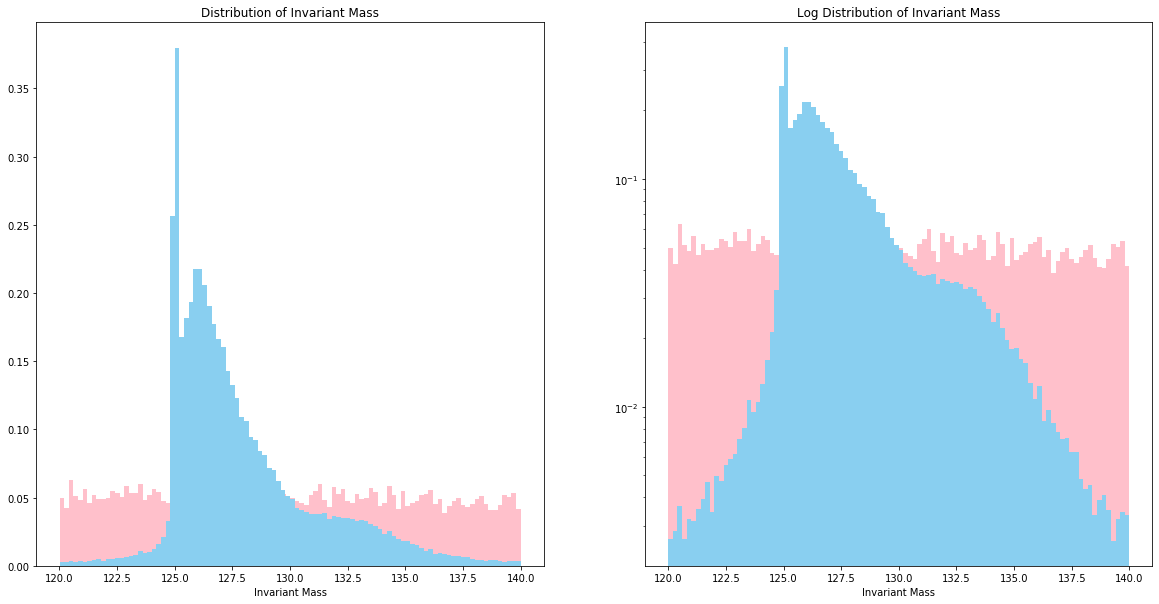

In [176]:
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(20,10)                   

ax[0].hist(cut_qcd, bins=100, density=True, color='pink')
ax[0].set_xlabel("Invariant Mass")
ax[0].set_title("Distribution of Invariant Mass")

ax[1].hist(cut_qcd, bins=100, density=True, color='pink')
ax[1].set_xlabel("Invariant Mass")
ax[1].set_yscale('log')
ax[1].set_title("Log Distribution of Invariant Mass")


ax[0].hist(cut_hig, bins=100, density=True, color='#89cff0')

ax[1].hist(cut_hig, bins=100, density=True, color='#89cff0')
ax[1].set_xlabel("Invariant Mass");

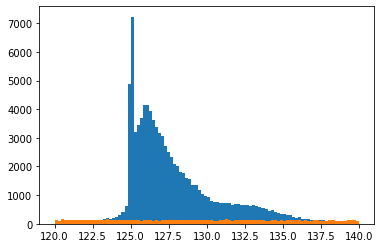

In [179]:
values1, bins1, _ = plt.hist(cut_hig, bins=100)
area_hig = sum(np.diff(bins1)*values1)

values, bins, _ = plt.hist(cut_qcd, bins=100)
area_qcd = sum(np.diff(bins)*values)


In [180]:
print(area_hig)
print(area_qcd)
print((area_hig*50)/(np.sqrt(area_qcd*2000)))

19041.438567660225
2502.3977854672876
425.57547144302015
